# 1 - Process McKinley Mine seeding unit vectors
This notebook opens and processes the shapefile for the different seeding units at McKinley Mine. Processing includes removing seeding units that are older than 2013 and long/thin seeding units that correspond to areas of vegetation restoration along roads and tracks.

## Setup

In [1]:
# Import libraries
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Set working directory
os.chdir(os.path.join('E:/',
                      'McKinley'))

## Import and process seeding unit polygons

In [3]:
# Import seeding units shapefile
mckinley_seeding_path = os.path.join(
    'vectors', 'Golder_GIS_Data_Export_2021_04_27_Seeding', 'Seeding_Master_shifted.shp')
mckinley_seeding = gpd.read_file(mckinley_seeding_path)

In [4]:
# Clean up columns
mckinley_seeding_subset = mckinley_seeding.loc[:, [
    'Mine_Area', 'Start_Year', 'End_Year', 'GIS_Acre2', 'Agreement', 'Seed_Type', 'TYPE', 'geometry']]

# Remove rows older than 2013
drop = mckinley_seeding_subset[mckinley_seeding_subset['Start_Year'] < 2013].index
mckinley_seeding_subset.drop(drop, inplace=True)

In [5]:
# Filter long thin polygons to remove roads, tracks, ROW's
# Calculate perimeter-area ratio
mckinley_seeding_subset['PAR'] = mckinley_seeding_subset.geometry.length / \
    mckinley_seeding_subset.geometry.area

# Filter by perimeter-area ratio
threshold = 0.01
mckinley_seeding_subset_PARlo = mckinley_seeding_subset[mckinley_seeding_subset['PAR'] < threshold]

## Visualize the seeding units

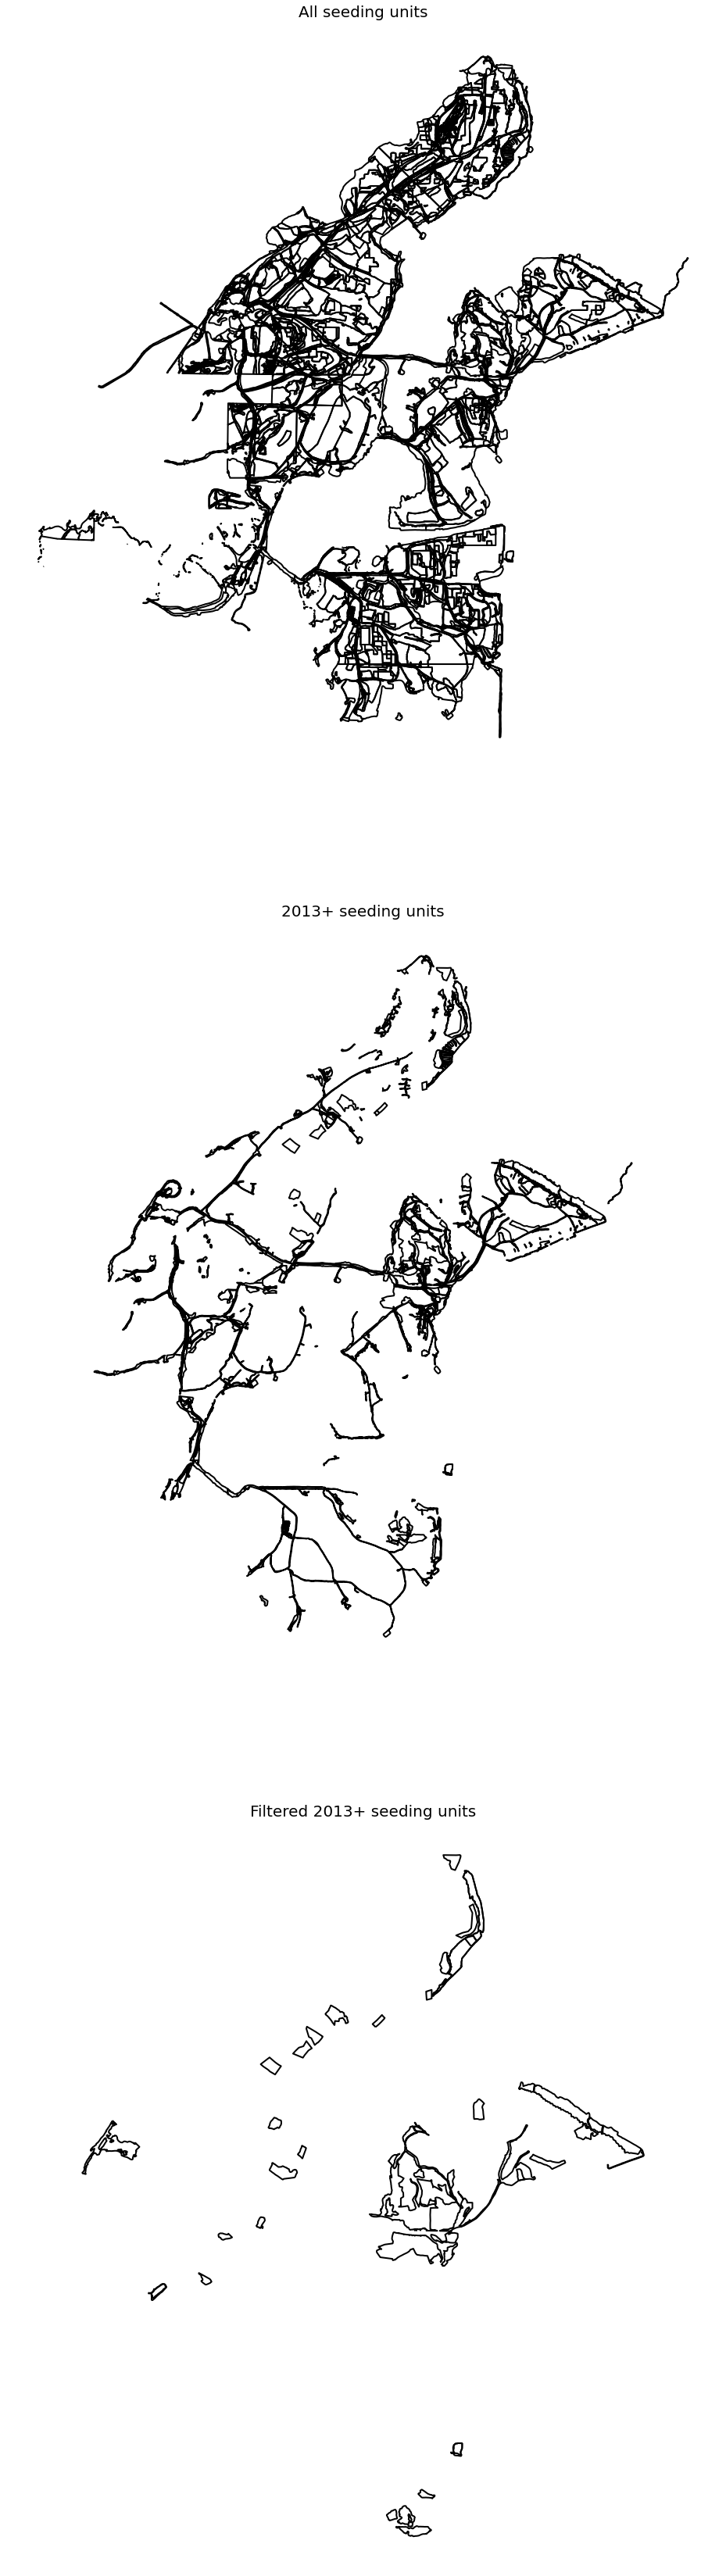

In [6]:
# Plot the filtered seeding units
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(100, 60))

mckinley_seeding.plot(ax=ax1,
                      color='None',
                      edgecolor='black',
                      linewidth=2)

ax1.set_title(
    "All seeding units", fontsize=20)


mckinley_seeding_subset.plot(ax=ax2,
                             color='None',
                             edgecolor='black',
                             linewidth=2)

ax2.set_title(
    "2013+ seeding units", fontsize=20)

mckinley_seeding_subset_PARlo.plot(ax=ax3,
                                   color='None',
                                   edgecolor='black',
                                   linewidth=2)

ax3.set_title(
    "Filtered 2013+ seeding units", fontsize=20)

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
plt.show()

In [7]:
# Display the DF
mckinley_seeding_subset_PARlo

,Mine_Area,Start_Year,End_Year,GIS_Acre2,Agreement,Seed_Type,TYPE,geometry,PAR
172,9N,2017,2017,8.774365,Permanent Program,Seed,Seeding,"POLYGON ((2401075.334 1683413.202, 2401068.257...",0.007403
816,None,2013,2013,55.702517,Permanent Program,Seed,Seeding,"POLYGON ((2378986.229 1702322.589, 2378982.791...",0.008140
913,None,2013,2013,45.834100,Permanent Program,Seed,Seeding,"MULTIPOLYGON (((2403966.161 1702249.371, 24039...",0.008526
916,None,2013,2013,166.414201,Permanent Program,Seed,Seeding,"POLYGON ((2398388.920 1703880.919, 2398403.538...",0.009537
1265,10,2013,2013,5.505459,Permanent Program,Reseed,Reseeding,"POLYGON ((2385163.827 1693999.402, 2385155.351...",0.009982
1314,11,2013,2013,96.634051,Permanent Program,Seed,Seeding,"POLYGON ((2399754.113 1695408.235, 2399762.904...",0.003032
1319,11,2013,2013,11.045688,Permanent Program,Seed,Seeding,"POLYGON ((2399974.214 1696112.931, 2399974.230...",0.009493
1558,None,2014,2014,83.281620,Permanent Program,Reseed,Reseeding,"POLYGON ((2402224.363 1715573.020, 2402213.169...",0.005979
1588,None,2014,2014,7.462737,Permanent Program,Reseed,Reseeding,"POLYGON ((2404782.569 1706591.781, 2404802.102...",0.009511
1589,None,2014,2014,10.456143,Permanent Program,Reseed,Reseeding,"POLYGON ((2409735.763 1703942.635, 2409767.743...",0.007148


## Save the DF for use in subsequent notebooks

In [8]:
%store mckinley_seeding_subset_PARlo

Stored 'mckinley_seeding_subset_PARlo' (GeoDataFrame)
